In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from methods import *
from oracles import PolytopeFeasibility
from utils import plot_graphs

# Polytope Feasibility Problem

$$
\min\limits_{x \in \mathbb{R}^n} f(x) 
= \sum\limits_{i = 1}^m \bigl( \langle a_i, x \rangle - b_i \bigr)_{+}^p,$$
where
$(t)_+ \overset{\text{def}}{=} \max\{0, t\}$ is positive slicing, $p \geq 2$ is a parameter;
$a_1, \ldots, a_m \in \mathbb{R}^n$ and $b \in \mathbb{R}^m$ are given data. 

### Parameters

In [3]:
n = 100 # Dimension
m = 200 # Number of linear inequalities
p = 3 # Smoothing parameter

### Generate random problem

In [4]:
np.random.seed(3124)

A = np.random.rand(m, n) * 2 - 1
b = np.random.rand(m) * 2 - 1
oracle = PolytopeFeasibility(A, b, p)

x_0 = np.ones(n) # Initial point

# Run Methods

### Gradient Method

In [5]:
_, msg, history_GM = gradient_method(oracle, x_0, 
                                     max_iter=4000, 
                                     L_0=1.0, 
                                     line_search=True)
print('Time: %.3f s' % history_GM['time'][-1])

Time: 0.398 s


### Fast Gradient Method

In [6]:
_, msg, history_FGM = fast_gradient_method(oracle, x_0, 
                                           max_iter=2000, 
                                           L_0=1.0, 
                                           line_search=True)
print('Time: %.3f s' % history_FGM['time'][-1])

Time: 0.517 s


### Super-Universal Newton, $\alpha = 1$

In [7]:
_, msg, history_super_newton_1 = super_newton(oracle, x_0, 
                                              n_iters=500, 
                                              H_0=1.0,
                                              adaptive_search=True, 
                                              alpha=1.0)
print('Time: %.3f s' % history_super_newton_1['time'][-1])

Time: 0.320 s


### Super-Universal Newton, $\alpha = \frac{2}{3}$

In [8]:
_, msg, history_super_newton_23 = super_newton(oracle, x_0, 
                                               n_iters=500, 
                                               H_0=1.0,
                                               adaptive_search=True, 
                                               alpha=2.0 / 3.0)
print('Time: %.3f s' % history_super_newton_23['time'][-1])

Time: 0.340 s


### Cubic Newton

In [9]:
_, msg, history_cubic_newton = cubic_newton(oracle, x_0, 
                                            n_iters=100, 
                                            H_0=1.0,
                                            adaptive_search=True)
print('Time: %.3f s' % history_cubic_newton['time'][-1])

Time: 0.348 s


# Show Results

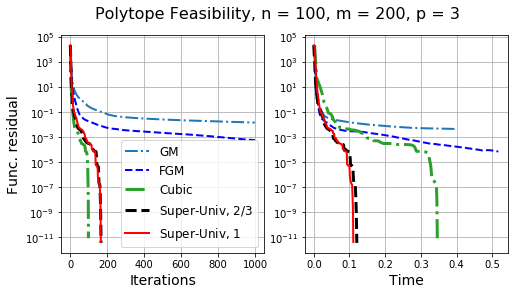

In [10]:
mn_func = min(np.min(history_GM['func']), 
              np.min(history_FGM['func']), 
              np.min(history_cubic_newton['func']),
              np.min(history_super_newton_1['func']),
              np.min(history_super_newton_23['func']))

plot_graphs([history_GM,  history_FGM, history_cubic_newton, 
             history_super_newton_23, history_super_newton_1], 
            ['GM', 'FGM', 'Cubic', r"Super-Univ, $2/3$", r"Super-Univ, $1$"],
            colors=['tab:blue', 'blue', 'tab:green', 'black', 'red'],
            linewidths=[2, 2, 3, 3, 2],
            linestyles=['-.', '--', '-.', '--', '-'],
            n=n, m=m, mu_str=("0.5"),
            f_star=mn_func,
            threshold=1e-10,
            suptitle=("Polytope Feasibility, n = %d, m = %d, p = %d" % (n, m, p)), 
            max_iter=1000)